In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Создаем обучающую выборку

In [8]:
c = np.array([-40, -10, 0, 8, 15, 22, 38]) #подаем на вход(градусы цельсия)
f = np.array([-40, 14, 32, 46, 59, 72, 100]) #ожидаем на выходе(градусы Фарингейта)

Создать модель многослойной НС

In [11]:
model = keras.Sequential() 

Создаем 1 слой в НС

In [12]:
model.add(Dense(units=1, input_shape=(1,), activation='linear'))

#в модель(model) 
#добавляем(.add) 
#первый слой нейронов(Dense) 
#в котором 1 нейрон(units=1)
#у нейрона 1 вход(input_shape=(1,)
#активационная функция (activation='linear')

Скомпилируем НС. Укажем критерий качетсва и способ оптимизации градиентного спуска.

In [14]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
#критерий качества как средний квадрат ошибок (loss='mean_squared_error')
#оптимизатор градиентного спуска( optimizer=keras.optimizer.Adam(0.1)), 0.1 - шаг сходимости

#когда вызывается метод compile, НС автоматически генерируется с некоторыми начальными случайными весовыми коэффицентами.

Алгоритм обучения НС

In [15]:
history = model.fit(c, f, epochs=500, verbose=False)

#запуска обучения НС (fit)
#входные значения обучающей выборки(c)
#выходные значения обучающей выборки(f)
#число эпох(epochs=500), по 500 раз пропустим данные(c) и на каждой итеррации будем вычислять (loss='mean_squared_error')
#вывод служебной информации в процессе обучения (verbose=False), выведем после обучения

Вывод графика

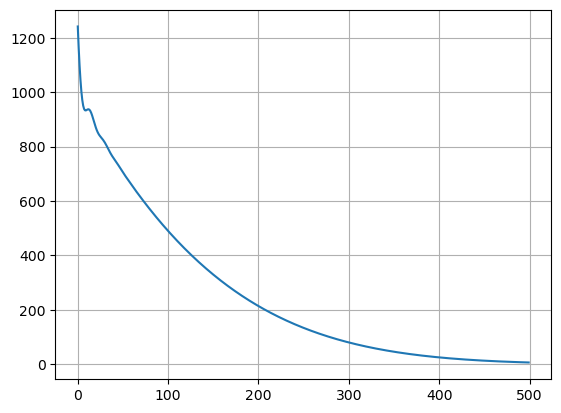

In [19]:
plt.plot(history.history['loss']) 
plt.grid(True)
plt.show()

Показатель качества снижался и дошел почти до нуля

Проверим НС после обучения

In [21]:
print(model.predict([100]))

1/1 [==============================] - 0s 58ms/step
[[211.33832]]


100 градувос Цельсия это 212 градусов по Фарингейту

Мы получили 211.34

Значение близкое к верному 

НС работает не плохо

Посмотрим весовые коэффициенты

In [22]:
print(model.get_weights())

[array([[1.8203413]], dtype=float32), array([29.30418], dtype=float32)]


У нас всего 1 нейрон и 2 весовых коэффициента

1.82 и 29.3

Достаточно близкие к математрической модели